<a href="https://colab.research.google.com/github/anslemhuncho/MACHINE-LEARNING-PROJECT/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mount drive in colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



compile the model

In [ ]:
!pip install keras-tuner



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


Found 3747 images belonging to 10 classes.
Found 411 images belonging to 10 classes.
Found 2069 images belonging to 10 classes.
Epoch 1/20
118/118 [==============================] - 93s 773ms/step - loss: 2.9937 - accuracy: 0.1879 - val_loss: 2.1686 - val_accuracy: 0.2500
Epoch 2/20
118/118 [==============================] - 89s 750ms/step - loss: 2.1730 - accuracy: 0.2210 - val_loss: 2.1956 - val_accuracy: 0.2109
Epoch 3/20
118/118 [==============================] - 84s 711ms/step - loss: 2.1246 - accuracy: 0.2514 - val_loss: 2.1154 - val_accuracy: 0.2708
Epoch 4/20
118/118 [==============================] - 88s 743ms/step - loss: 2.0650 - accuracy: 0.2722 - val_loss: 2.0846 - val_accuracy: 0.2839
Epoch 5/20
118/118 [==============================] - 85s 720ms/step - loss: 2.0114 - accuracy: 0.2869 - val_loss: 2.0535 - val_accuracy: 0.2760
Epoch 6/20
118/118 [==============================] - 87s 735ms/step - loss: 1.9825 - accuracy: 0.2976 - val_loss: 2.0645 - val_accuracy: 0.2865
Ep

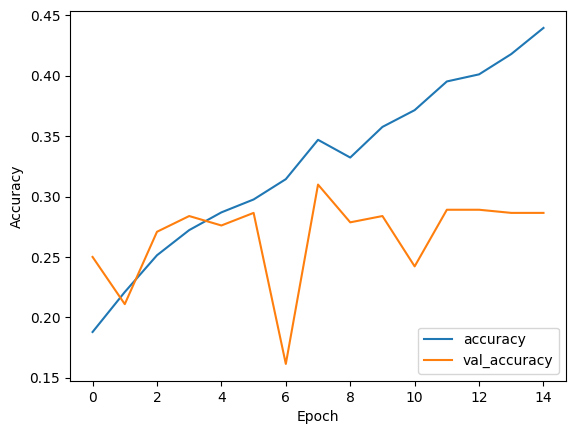

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define paths to your train and test folders
train_path = '/content/drive/MyDrive/Normalised data/train'
test_path = '/content/drive/MyDrive/Normalised data/test'

# Set up data generators with data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # Add validation split here
)

# Adjust batch size based on your system's memory
batch_size = 32
# Define the list of class labels corresponding to your dataset
class_labels = ['animals_protection', 'appealing_for_peace', 'brexit', 'covid19', 'election', 'environment_protection', 'gender_equality', 'immigration', 'racial_equality', 'yellow_vests_movement']

# Generate batches of augmented data from train and test folders with validation split
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,  # Manually specify class labels
    shuffle=True,
    subset='training'  # Specify subset as training for train data
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,  # Manually specify class labels
    shuffle=False,
    subset='validation'  # Specify subset as validation for validation data
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,  # Manually specify class labels
    shuffle=False
)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(254, 254, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # Increased complexity
model.add(Dropout(0.5))  # Increased dropout rate
model.add(Dense(len(class_labels), activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,  # Increased epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[EarlyStopping(patience=5)]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
pip install optuna


print predictions

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on a batch of test images
test_images, test_labels = next(test_generator)  # Get a batch of test images and labels
predictions = model.predict(test_images)

# Print predictions for each image in the batch
for i in range(len(test_images)):
    prediction = predictions[i]
    predicted_class_index = prediction.argmax()
    predicted_class = class_labels[predicted_class_index]
    print(f"Image {i+1}: Predicted Class: {predicted_class}, Predicted Probability: {prediction[predicted_class_index]:.4f}")



65/65 [==============================] - 94s 1s/step - loss: 1.4259 - accuracy: 0.5394
Test Accuracy: 0.5393909811973572
1/1 [==============================] - 1s 880ms/step
Image 1: Predicted Class: appealing_for_peace, Predicted Probability: 0.3358
Image 2: Predicted Class: animals_protection, Predicted Probability: 0.2852
Image 3: Predicted Class: election, Predicted Probability: 0.2039
Image 4: Predicted Class: appealing_for_peace, Predicted Probability: 0.2050
Image 5: Predicted Class: animals_protection, Predicted Probability: 0.4474
Image 6: Predicted Class: animals_protection, Predicted Probability: 0.2383
Image 7: Predicted Class: animals_protection, Predicted Probability: 0.3296
Image 8: Predicted Class: brexit, Predicted Probability: 0.2441
Image 9: Predicted Class: appealing_for_peace, Predicted Probability: 0.2051
Image 10: Predicted Class: brexit, Predicted Probability: 0.2509
Image 11: Predicted Class: animals_protection, Predicted Probability: 0.4415
Image 12: Predicted

65/65 [==============================] - 84s 1s/step - loss: 1.4259 - accuracy: 0.5394
Test Accuracy: 0.5393909811973572
65/65 [==============================] - 83s 1s/step


<Figure size 1000x800 with 0 Axes>

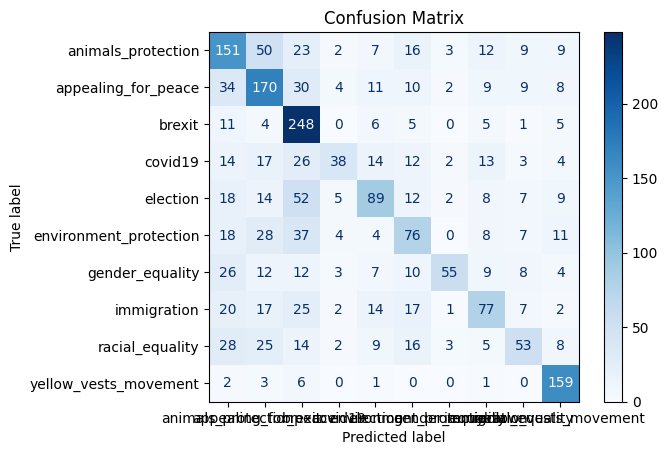

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(len(class_labels)))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.4 MB/s eta 0:00:00
